<a href="https://colab.research.google.com/github/kiranahire03/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_(Kiran_Ahire).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project 4**


# **Project Title : Extraction/identification of major topics & themes discussed in news articles.**

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Loading Dataset and Importing Modules**

In [ ]:
#Imoprting modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load the data set from drive
customer_df=pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

## **Understanding the data**

In [ ]:
#first five rows of dataset
customer_df.head()

In [ ]:
#last five rows of dataset
customer_df.tail()

In [ ]:
#Getting the shape of dataset with rows and columns
customer_df.shape

In [ ]:
#Getting all the columns
print("Features of the dataset:")
customer_df.columns

In [ ]:
customer_df.info()

In [ ]:
#print the unique value
customer_df.nunique()

In [ ]:
#Looking for the description of the dataset to get insights of the data
customer_df.describe().T

## **Features Description**

* ### **InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.**
* ### **StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.**
* ### **Description: Product (item) name. Nominal.**
* ### **Quantity: The quantities of each product (item) per transaction. Numeric.**
* ### **InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated**.
* ### **UnitPrice: Unit price. Numeric, Product price per unit in sterling.**
* ### **CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.**
* ### **Country: Country name. Nominal, the name of the country where each customer resides.**

# **Preprocessing the dataset**

## **Missing values**

In [ ]:
#check for count of missing values in each column.
customer_df.isna().sum()
customer_df.isnull().sum()

In [ ]:
# Checking Null Value by plotting Heatmap
sns.heatmap(customer_df.isnull(), cbar=False)

* **There is some null value present in our dataset  in features 'CustomerID' and  'Description'** 

In [ ]:
#drop the rows having null values
customer_df.dropna(inplace = True)

In [ ]:
customer_df.info()

In [ ]:
customer_df.shape

In [ ]:
# Checking Null Value by plotting Heatmap
sns.heatmap(customer_df.isnull(), cbar=False)


*   **The above heatmap shows there are no null values present in dataset fter removing them.**




## **Duplicate values**

In [ ]:
# Checking Duplicate Values
value=len(customer_df[customer_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

In [ ]:
customer_df[customer_df.duplicated()]

In [ ]:
# Dropping Duplicate Rows
customer_df=customer_df.drop_duplicates()
len(customer_df[customer_df.duplicated()])

In [ ]:
customer_df.shape

### **we have to drop some  InvoiceNo  which are starts with 'c' because 'c', it indicates a cancellation**

In [ ]:
customer_df['InvoiceNo'] = customer_df['InvoiceNo'].astype('str')

In [ ]:
# checking invoice no.
customer_df[customer_df['InvoiceNo'].str.contains('C')]

In [ ]:
#removing invoiceNo starting with C
customer_df=customer_df[~customer_df['InvoiceNo'].str.contains('C')]

In [ ]:
customer_df.shape

In [ ]:
customer_df.columns

### **Converting 'InvoiceDate' column into 'year','month','day','hour','minute','second'**

In [ ]:
customer_df['InvoiceDate_year'] = customer_df['InvoiceDate'].dt.year
customer_df['InvoiceDate_month'] = customer_df['InvoiceDate'].dt.month
customer_df['InvoiceDate_day'] = customer_df['InvoiceDate'].dt.day
customer_df['InvoiceDate_hour'] = customer_df['InvoiceDate'].dt.hour
customer_df['InvoiceDate_minute'] = customer_df['InvoiceDate'].dt.minute
customer_df['InvoiceDate_second'] = customer_df['InvoiceDate'].dt.second

In [ ]:
print("Columns and data types")
pd.DataFrame(customer_df.dtypes).rename(columns = {0:'dtype'})

In [ ]:
customer_df.columns

In [ ]:
customer_df.shape

# **Exploratory Data Analysis**

### **Analysis of 'CustomerID'**

In [ ]:
# let us see the unique ids of customers
print('The no. of customers = ',customer_df['CustomerID'].nunique())

**We have total 392732 customers but there are only 4339 customers so lets find how many active customers are present.**

In [35]:
# finding most active customer
active_customers=pd.DataFrame(customer_df['CustomerID'].value_counts().sort_values(ascending=False).reset_index())
active_customers.rename(columns={'index':'CustomerID','CustomerID':'Count'},inplace=True)
active_customers

,CustomerID,Count
0,17841.0,7676
1,14911.0,5672
2,14096.0,5111
3,12748.0,4413
4,14606.0,2677
...,...,...
4334,16990.0,1
4335,13302.0,1
4336,13017.0,1
4337,17923.0,1


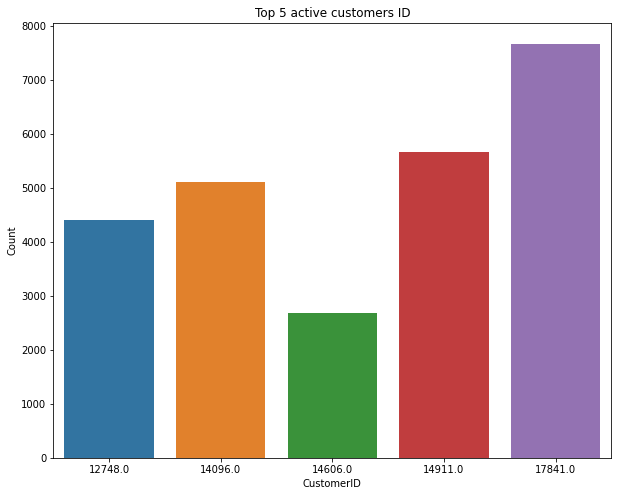

In [36]:
plt.figure(figsize=(10,8))
plt.title('Top 5 active customers ID')
sns.barplot(x='CustomerID',y='Count',data=active_customers[:5])

## **Analysis of  Categorical Features**

In [37]:
categorical_columns=list(customer_df.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')

## **Analysis of 'Description'** 

In [38]:
Description_df=customer_df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)

In [39]:
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1390


In [40]:
Description_df.tail()

,Description_Name,Count
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


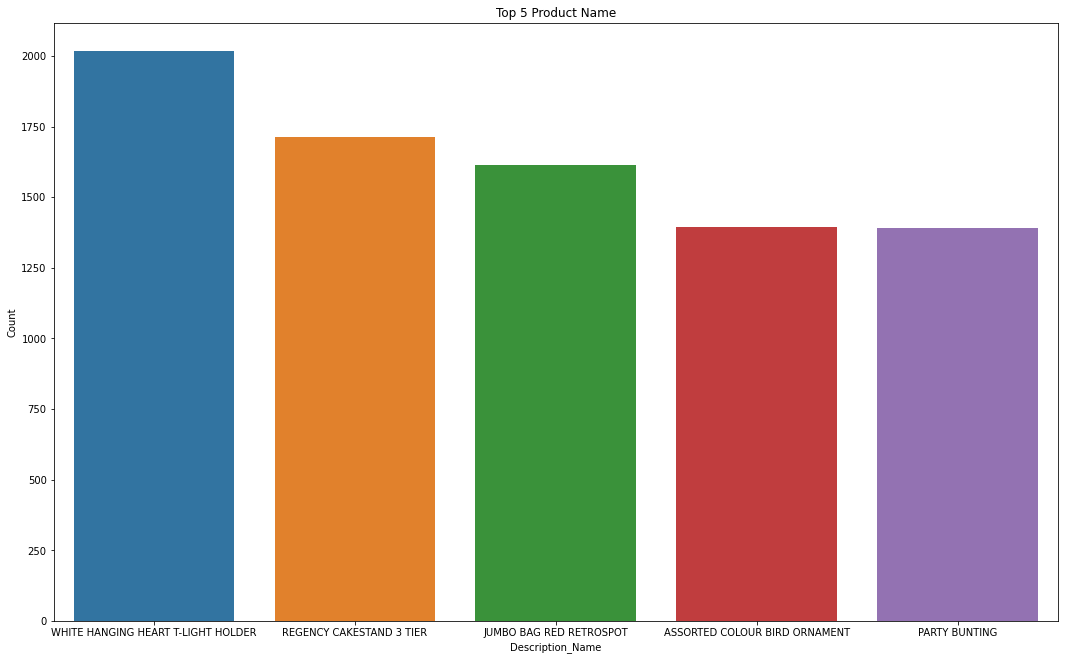

In [41]:
plt.figure(figsize=(18,11))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])

## **Analysis of 'StockCode'**

In [42]:
StockCode_df=customer_df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)

In [43]:
StockCode_df.head()

,StockCode_Name,Count
0,85123A,2023
1,22423,1714
2,85099B,1615
3,84879,1395
4,47566,1390


In [44]:
StockCode_df.tail()

,StockCode_Name,Count
3660,20678,1
3661,90059D,1
3662,90168,1
3663,90169,1
3664,23843,1


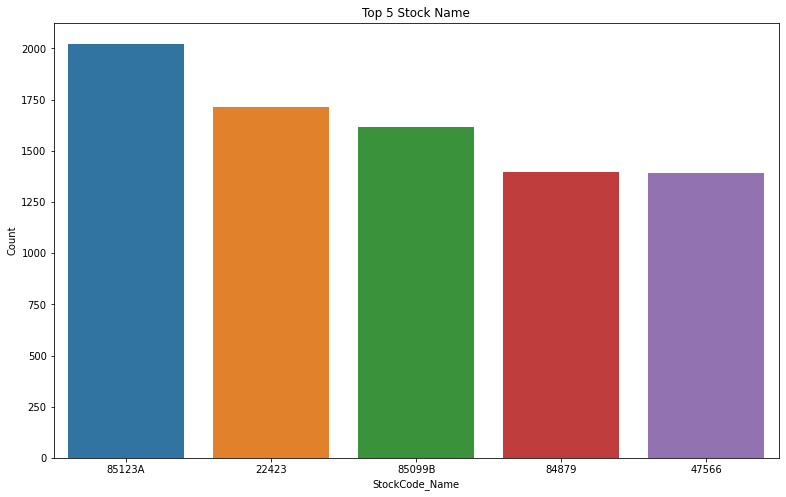

In [45]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[:5])

## **Analysis of 'Country'**

In [46]:
country_df=customer_df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)

In [47]:
country_df.head()

,Country_Name,Count
0,United Kingdom,349227
1,Germany,9027
2,France,8327
3,EIRE,7228
4,Spain,2480


In [48]:
country_df.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


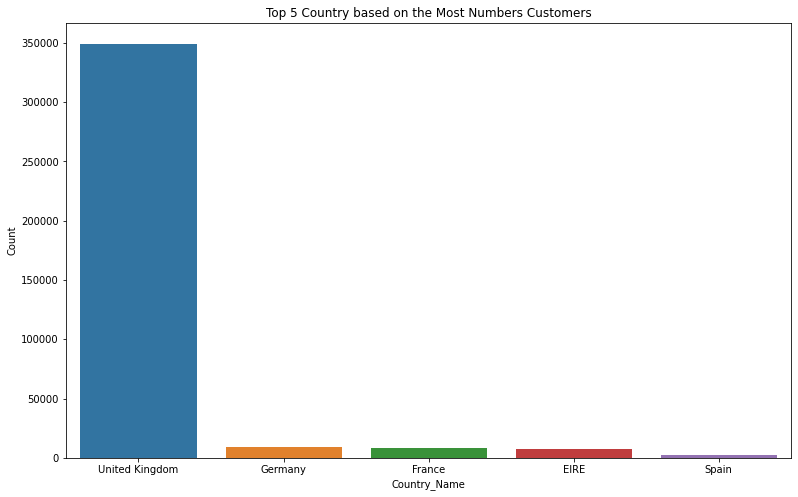

In [49]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[:5])

**From this graph we can see that most of the customers are from United Kingdom ,Germany ,France ,EIRE and Spain**

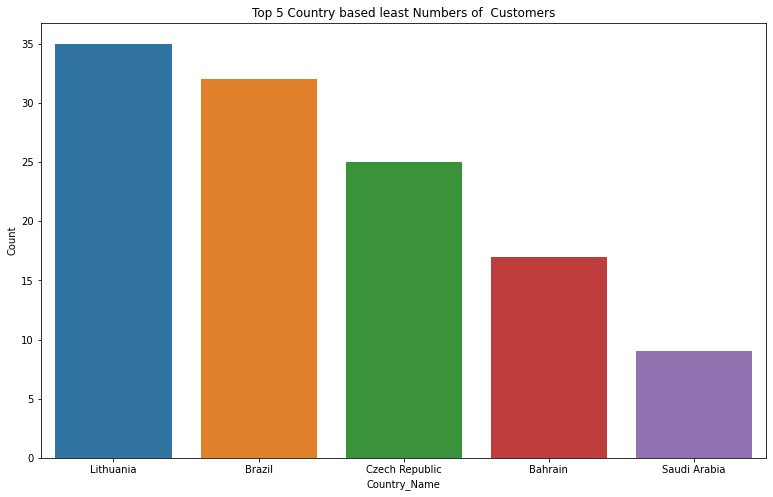

In [50]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Country based least Numbers of  Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:])

**From this graph we can see that least number of customers from Lithuania,Brazil, Czech Republic ,Bahrain  and Saudi Arabia**